In [2]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
# from tensorflow.keras.utils import to  categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam


In [3]:
zip_path=r"C:\Users\Lenovo\Downloads\Brain_tumour.zip"
extract_path=r"C:\Users\Lenovo\Downloads\Brain_tumour"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
yes_path= os.path.join(extract_path, 'yes')
no_path= os.path.join(extract_path, 'no')

yes_image=Image.open(os.path.join(yes_path, os.listdir(yes_path)[0]))
no_image=Image.open(os.path.join(no_path, os.listdir(no_path)[0]))

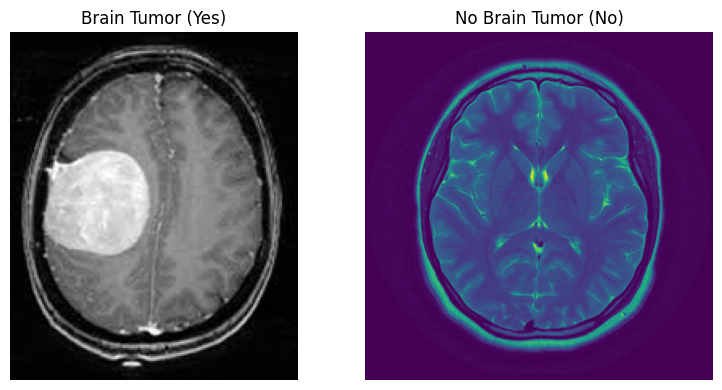

In [5]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(yes_image)
plt.title('Brain Tumor (Yes)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(no_image)
plt.title('No Brain Tumor (No)')
plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
def load_images(folder_path,label,img_size=(150,150)):
    data=[]
    for filename in os.listdir(folder_path):
        img_path=os.path.join(folder_path,filename)
        try:
            img=Image.open(img_path).resize(img_size)
            img=np.array(img)
            if img.shape == (150, 150, 3):  # Ensure the image has 3 channels
                data.append((img, label))
        except:
            continue
    return data
yes_data=load_images(yes_path,1)
no_data=load_images(no_path,0)

# Combine and shuffle the data
all_data=yes_data+no_data
np.random.shuffle(all_data)
x=np.array([item[0] for item in all_data])
y=np.array([item[1] for item in all_data])

In [7]:
X=x/255.0  # Normalize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
model=Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history=model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6032 - loss: 0.6462 - val_accuracy: 0.6364 - val_loss: 0.6085
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 447ms/step - accuracy: 0.6943 - loss: 0.5717 - val_accuracy: 0.7045 - val_loss: 0.6103
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.7552 - loss: 0.5116 - val_accuracy: 0.7273 - val_loss: 0.6128
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.7794 - loss: 0.5006 - val_accuracy: 0.7273 - val_loss: 0.6220
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.8072 - loss: 0.4556 - val_accuracy: 0.7273 - val_loss: 0.6098
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.7801 - loss: 0.4578 - val_accuracy: 0.7273 - val_loss: 0.5956
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.8289 - loss: 0.4184 - val_accuracy: 0.7273 - val_loss: 0.5971
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.7814 - loss: 0.4252 - val_accuracy: 0.7045 - val_loss: 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step 
Classification Report
               precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.76      0.79      0.77        28

    accuracy                           0.70        44
   macro avg       0.68      0.67      0.68        44
weighted avg       0.70      0.70      0.70        44



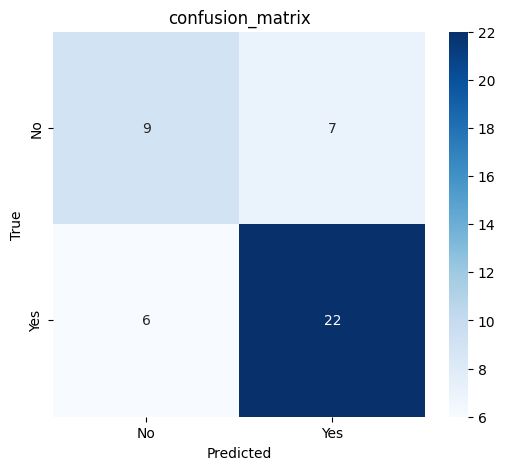

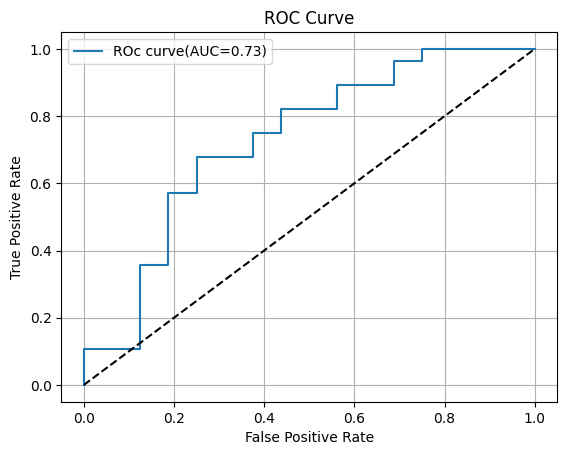

In [11]:
y_pred_prob=model.predict(X_test)
y_pred=(y_pred_prob > 0.5).astype(int).reshape(-1)

print("Classification Report\n",classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.title('confusion_matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr,tpr,_=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,label=f'ROc curve(AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()